In [1]:
### 데이터 처리
import pandas as pd

### 시각화 라이브러리 정의
# - 파이썬에서 사용되는 기본 시각화 라이브러리
import matplotlib.pyplot as plt

# - 히트맵 라이브러리
import seaborn as sns

# - 한글처리
plt.rc("font", family="Malgun Gothic")

# - 마이너스 기호 깨짐 처리
plt.rcParams["axes.unicode_minus"] = False


file_path = "./02_data_all/df_bus_card_tot.csv"
df_bus_card_tot = pd.read_csv(file_path, sep=",")

### 1. 버스 이용량 분석 - 히트맵을 이용한 월별 vs 일자별 버스 이용량 현황 분석

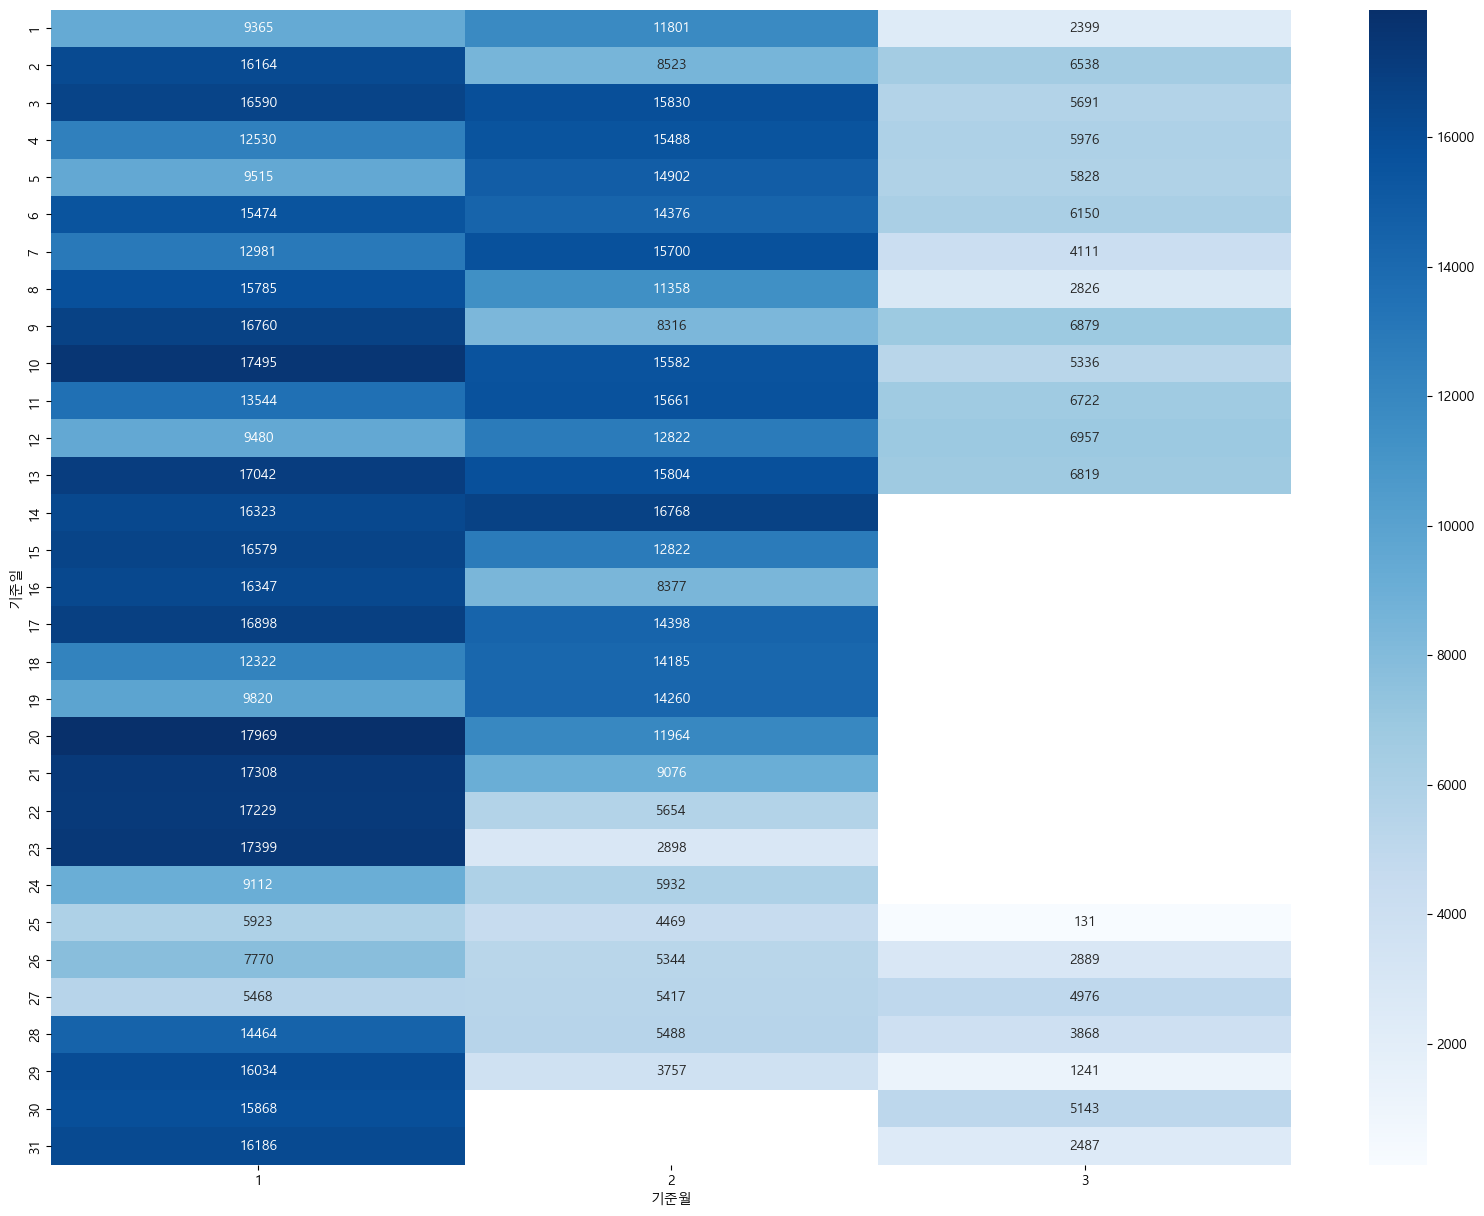

In [3]:
df_pivot = df_bus_card_tot.pivot_table(index="기준일",
                                       columns="기준월",
                                       values="승객연령",
                                       aggfunc="count")
plt.figure(figsize=(20, 15))

plt.title("월 및 일별 버스 이용량")

sns.heatmap(df_pivot, annot=True, fmt=".0f",cmap = "rocket_r")

plt.show()

In [4]:
"""
데이터 분석 
0. 이용 빈도
이용 빈도수가 많은 날짜는
1월 : 2,3,6,8,9,10,13,14,15,16,17,20,21,22,23,29,30,31
2월 : 3,4,5,7,10,11,,13,14,19일이며 월화 목금으로 나뉘고 있습니다.

1. 이용량 저하 사유
2월 19일 이후 대중교통 이용량 저하는 : 코로나로 인한 대중교통 이용감소로 인지되고 있습니다
"""

'\n데이터 분석 \n0. 이용 빈도\n이용 빈도수가 많은 날짜는\n1월 : 2,3,6,8,9,10,13,14,15,16,17,20,21,22,23,29,30,31\n2월 : 3,4,5,7,10,11,,13,14,19일이며 월화 목금으로 나뉘고 있습니다.\n\n1. 이용량 저하 사유\n2월 19일 이후 대중교통 이용량 저하는 : 코로나로 인한 대중교통 이용감소로 인지되고 있습니다\n'

### 2. 버스 이용량 분석 - 히트맵을 이용한 일자별 vs 시간별 버스 이용량 현황 분석

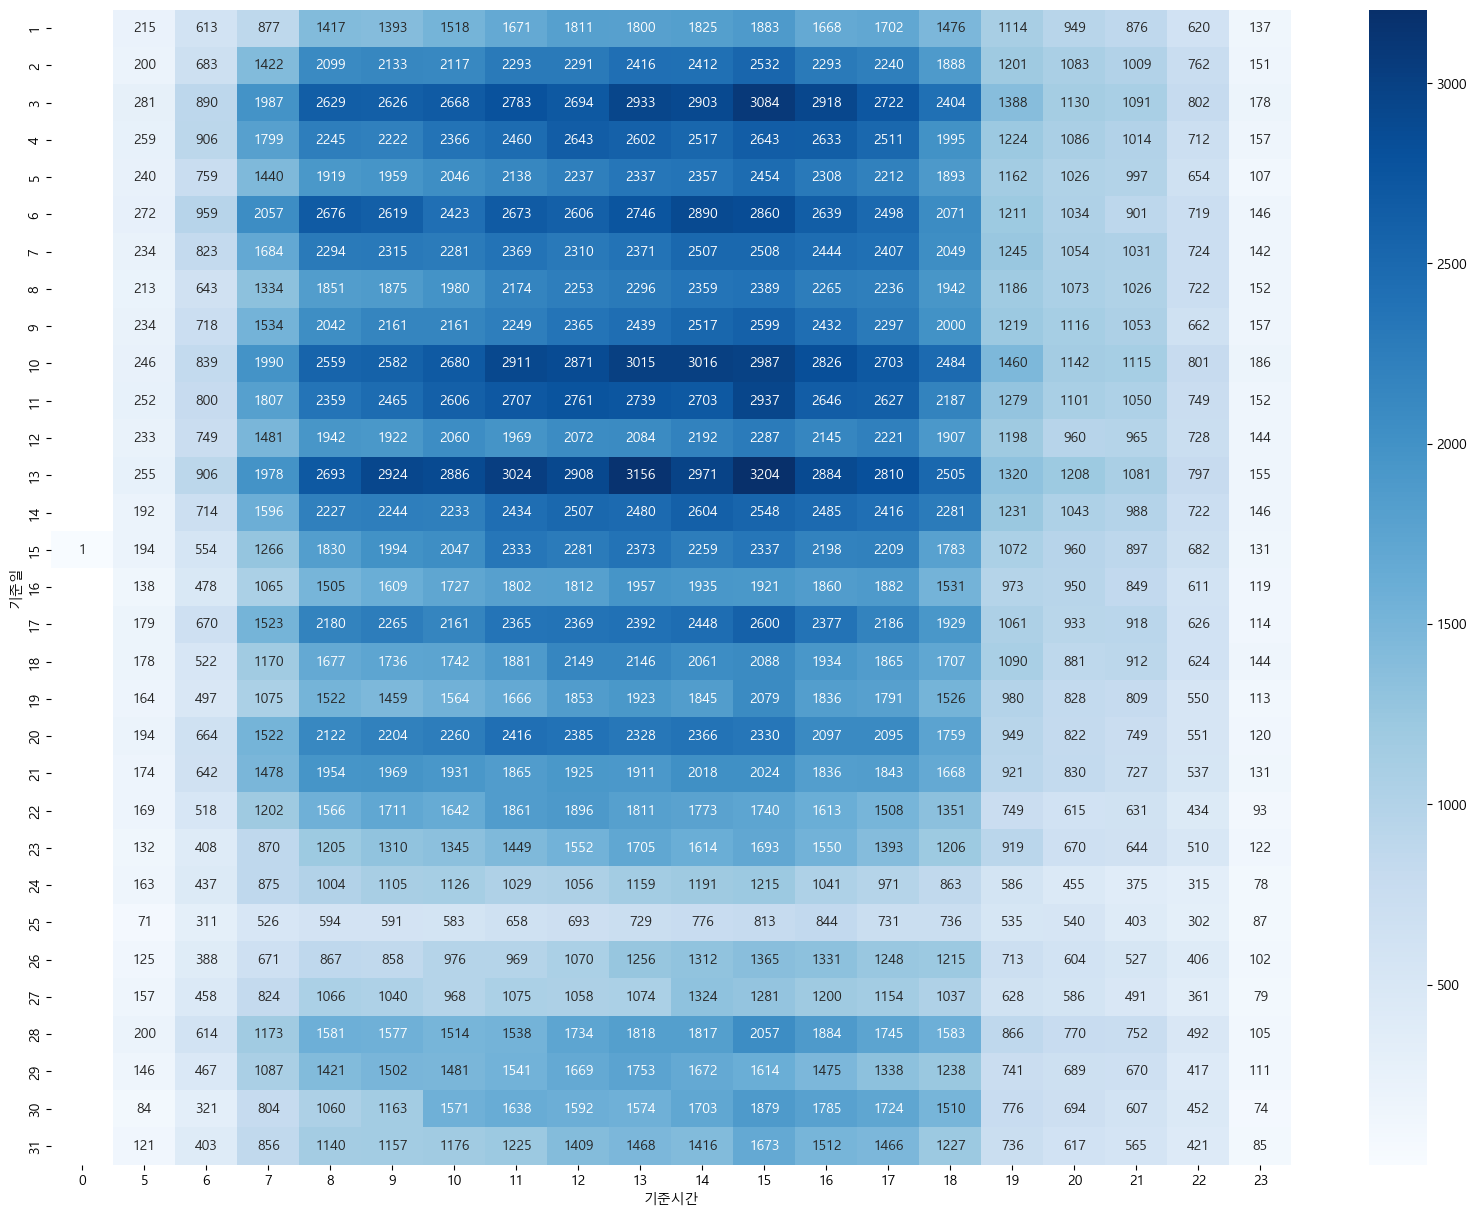

In [5]:
df_pivot = df_bus_card_tot.pivot_table(
    index="기준일",
    columns="기준시간",
    values="승객연령",
    aggfunc="count"
)
plt.figure(figsize=(20, 15))

plt.title

sns.heatmap(df_pivot, annot=True, fmt=".0f", cmap="Blues")

plt.show()

In [6]:
# 1. 일별 이용량 변동 (기준일)
# 평균: 하루 평균 27,151명 이용
# 최소: 하루 10,523명 (가장 적은 날)
# 최대: 하루 39,665명 (가장 많은 날)
# 변동 폭: 하루 이용량이 10,000명~40,000명 사이로 분포
# 표준편차: 7,509명, 즉 일별 변동이 크다 (일부 특정 날짜에 이용량 급증 가능)

# 2. 시간대별 이용량 변동 (기준시간)
# 평균: 시간대 평균 42,084명
# 최소: 특정 시간에 1명 (거의 이용 없음)
# 최대: 특정 시간에 67,624명 (가장 붐비는 시간)
# 변동 폭: 시간대별 차이가 매우 큼, 출퇴근 시간 영향 가능성

### 3. 막대 그래프를 이용한 버스 이용 연령대와 버스내 체류시간의 관계 분석

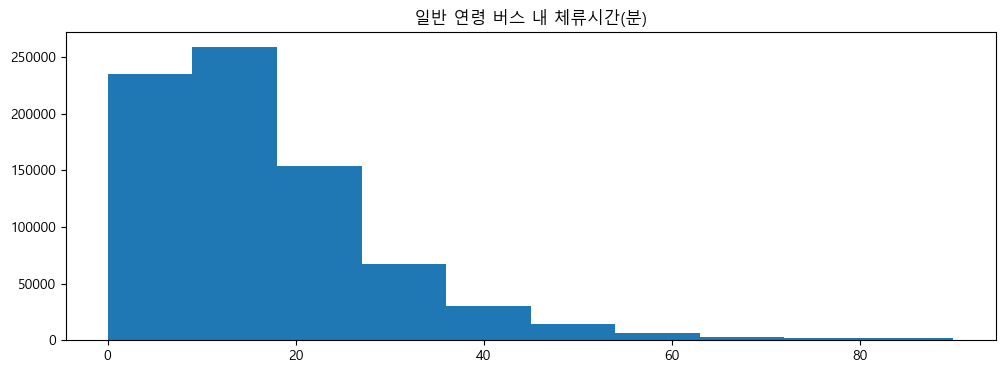

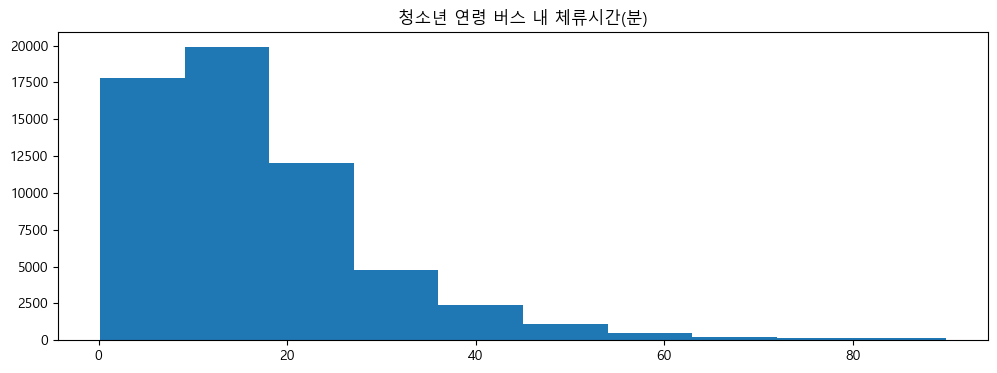

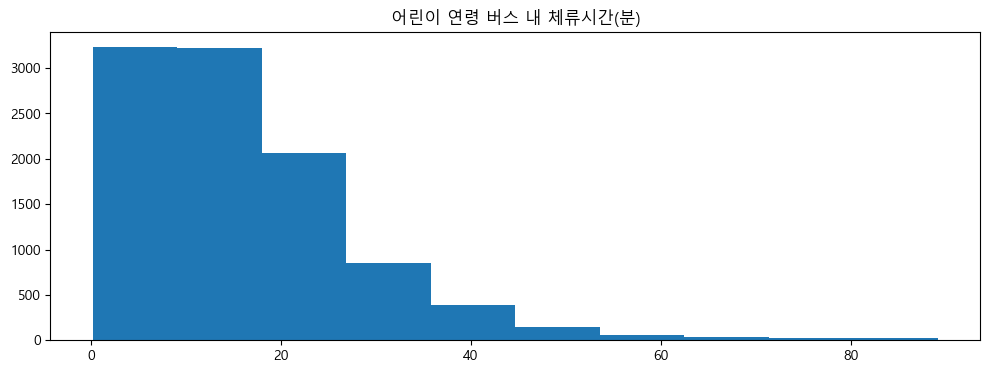

In [7]:
# 1. 승객 연령 종류 별 반복
age_type = ['일반', '청소년', '어린이']

for ty in age_type:
    c = df_bus_card_tot["승객연령"] == ty
    df_fillter = df_bus_card_tot[c==True]
    plt.figure(figsize=(12,4))
    
    plt.hist(df_fillter["버스내체류시간(분)"])

    plt.title(f"{ty} 연령 버스 내 체류시간(분)")

In [8]:
"""
0. 승객 연령("일반", "청소년", "어린이")을 기준으로 버스 내 체류시간을 비교
1. 연령대 별 "일반" 연령대가 압도적으로 많다.
2. 전 연령대에서 10-20분 내 체류시간이 가장 많이 나타난다.
3. 어린이의 경우에는 0-10분대와 10-20분대의 차이가 크지 않다.
4. 데이터 양 차이가 너무 커서 비교 시각화가 무의미하다.
"""

'\n0. 승객 연령("일반", "청소년", "어린이")을 기준으로 버스 내 체류시간을 비교\n1. 연령대 별 "일반" 연령대가 압도적으로 많다.\n2. 전 연령대에서 10-20분 내 체류시간이 가장 많이 나타난다.\n3. 어린이의 경우에는 0-10분대와 10-20분대의 차이가 크지 않다.\n4. 데이터 양 차이가 너무 커서 비교 시각화가 무의미하다.\n'

### 4. 산점도 그래프를 이용한 출근시간(오전 5시~8시)과 버스내 체류시간의 관계 분석

([<matplotlib.axis.XTick at 0x233db3c02b0>,
 [Text(5, 0, '5'), Text(6, 0, '6'), Text(7, 0, '7'), Text(8, 0, '8')])

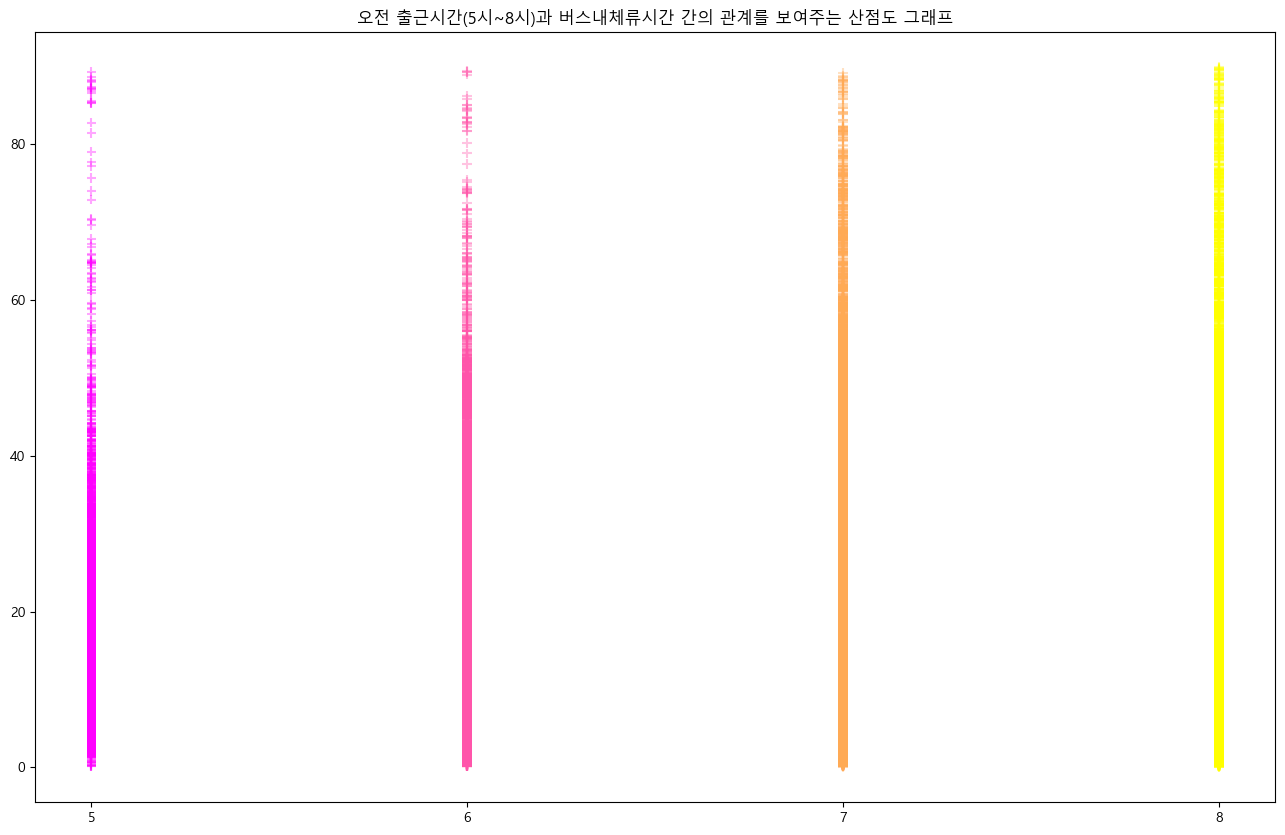

In [9]:
### 기준시간이 5<=x<=8인 것만 뽑기
c = (df_bus_card_tot["기준시간"] >= 5) & (df_bus_card_tot["기준시간"] <= 8)
go_to_work = df_bus_card_tot[c]

### 기준시간이 5<=x<=8인 것 중 버스내체류시간(분) 내림차순하기
takes_time = go_to_work.sort_values("버스내체류시간(분)", ascending=False)

SL = takes_time["기준시간"]
PL = takes_time["버스내체류시간(분)"]

# - 그래프 사이즈
plt.figure(figsize=(16, 10))

# - 그래프 제목
plt.title("오전 출근시간(5시~8시)과 버스내체류시간 간의 관계를 보여주는 산점도 그래프")

plt.scatter(SL, PL, c = SL, alpha = 0.35, s = 50, marker = '+', cmap = 'spring')

### x축 구간에 대한 값의 범위 재정의하기
xList = [5,6,7,8]
plt.xticks(xList)

In [10]:
"""
1. '기준시간'(승차시간)이 아침(오전)일 경우 '버스체류시간'이 길면 승객의 불편이 증가함 예) 출근, 등교
    - '버스내체류시간'이 60분 이상 걸리는 버스 이용객 수가 많으면 그 시간대에는 급행 버스 개설하는 것이 승객들의 불편을 줄일 수 있음.
2. 오전 5시부터 8시까지의 시간에 탑승하는 승객을 출근 또는 등교하는 사람으로 가정
3. 전체 데이터프레임(df_bus_card_tot)을 활용하여 '기준시간'이 5시 이상, 8시 이하인 행들만 선택 하고, '버스내체류시간(분)' 컬럼을 기준으로 내림차순하여
   'takes_time'라는 새로운 데이터프레임 생성
4. 'takes_time' 데이터프레임을 이용해서 산점도 그래프를 작성한다
5. 결론 : 그래프 상에서 5시, 6시와 비교했을 때 7시와 8시대에서 '버스체류시간(분)'이 60분 이상 소요되는 구간에 상대적으로 점들이 많은 것으로 보아 이 시간대에 출근 또는 등교를 많이 하는것으로 보임.
          따라서 7시, 8시 사이에 급행버스를 개설하는 것을 추천함.
"""

"\n1. '기준시간'(승차시간)이 아침(오전)일 경우 '버스체류시간'이 길면 승객의 불편이 증가함 예) 출근, 등교\n    - '버스내체류시간'이 60분 이상 걸리는 버스 이용객 수가 많으면 그 시간대에는 급행 버스 개설하는 것이 승객들의 불편을 줄일 수 있음.\n2. 오전 5시부터 8시까지의 시간에 탑승하는 승객을 출근 또는 등교하는 사람으로 가정\n3. 전체 데이터프레임(df_bus_card_tot)을 활용하여 '기준시간'이 5시 이상, 8시 이하인 행들만 선택 하고, '버스내체류시간(분)' 컬럼을 기준으로 내림차순하여\n   'takes_time'라는 새로운 데이터프레임 생성\n4. 'takes_time' 데이터프레임을 이용해서 산점도 그래프를 작성한다\n5. 결론 : 그래프 상에서 5시, 6시와 비교했을 때 7시와 8시대에서 '버스체류시간(분)'이 60분 이상 소요되는 구간에 상대적으로 점들이 많은 것으로 보아 이 시간대에 출근 또는 등교를 많이 하는것으로 보임.\n          따라서 7시, 8시 사이에 급행버스를 개설하는 것을 추천함.\n"